In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
amazonData = pd.read_csv('Amazon_Unlocked_Mobile.csv')

In [29]:
# 1 - positive
# 0 - negative

In [30]:
amazonData.shape

(413840, 6)

In [31]:
amazonData = amazonData.dropna(axis=0)

In [32]:
amazonData.shape

(334335, 6)

In [33]:
amazonData = amazonData[["Reviews","Rating"]]

In [34]:
amazonData.head()

,Reviews,Rating
0,I feel so LUCKY to have found this used (phone...,5
1,"nice phone, nice up grade from my pantach revu...",4
2,Very pleased,5
3,It works good but it goes slow sometimes but i...,4
4,Great phone to replace my lost phone. The only...,4


In [35]:
amazonDataPositiveDf = amazonData[amazonData["Rating"].isin([4,5])]

In [36]:
amazonDataPositive5 = amazonData[amazonData["Rating"] == 5]

In [38]:
amazonDataPositive4 = amazonData[amazonData["Rating"] == 4]
print('Shape 4:', amazonDataPositive4.shape)
amazonDataPositive4.head()

Shape 4: (50421, 2)


,Reviews,Rating
1,"nice phone, nice up grade from my pantach revu...",4
3,It works good but it goes slow sometimes but i...,4
4,Great phone to replace my lost phone. The only...,4
18,I love the phone. It does everything I need an...,4
20,The battery was old & had been over used becau...,4


In [39]:
amazonDataPositive5.shape

(180253, 2)

In [40]:
amazonDataPositive = pd.concat([amazonDataPositive4[:5000], amazonDataPositive5[:10000]])

In [41]:
amazonDataPositive.tail()

,Reviews,Rating
27235,great,5
27236,Worked great thanks Amazon,5
27237,Thanks,5
27239,"The phone arrived on time,I'm happy with the p...",5
27240,Meet my expectations!,5


In [42]:
amazonDataPositive.shape

(15000, 2)

In [43]:
amazonDataNegative = amazonData[amazonData["Rating"].isin([1,2])]

In [44]:
amazonDataNegative.shape

(77603, 2)

In [45]:
amazonDataNegative.head()

,Reviews,Rating
5,I already had a phone with problems... I know ...,1
6,The charging port was loose. I got that solder...,2
7,"Phone looks good but wouldn't stay charged, ha...",2
13,I'm really disappointed about my phone and ser...,1
15,Had this phone before and loved it but was not...,2


In [46]:
amazonData["Rating"].value_counts()

5    180253
1     57535
4     50421
3     26058
2     20068
Name: Rating, dtype: int64

<AxesSubplot:>

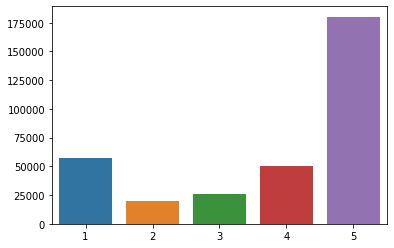

In [19]:
sns.barplot(x=amazonData.Rating.value_counts().index, y=amazonData.Rating.value_counts().values)

In [20]:
amazonDataFiltered = pd.concat([amazonDataPositive, amazonDataNegative[:15000]])

In [47]:
amazonDataFiltered["Reviews"][200]

"As good as you can hope for in a phone for seniors. Reminiscent of a cordless house phone -- makes it easy to use for an 84-year-old. Buttons light up bright, ringtone volume is adjustable and on max it's more than loud enough for anyone with a hearing problem; though surprisingly the call volume is not adjustable, though it is louder than the previous Verizon flip phone on max volume. I set this up with Cricket service. The phone takes a MINI SIM CARD. Not a micro as someone else has stated. I had to buy another sim card because the micro I ordered was too small. Mini sims are the original, large cards. We live in the US. I don't know people are claiming this phone doesn't work in the US. I paid 30ish for this phone, but would have paid up to 100 for it because of the design and functionality. Side note: I was concerned that my grandmother would always accidentally hit the SOS button this phone has, but it can be disabled in the settings."

In [48]:
amazonDataFiltered.shape

(30000, 3)

<AxesSubplot:>

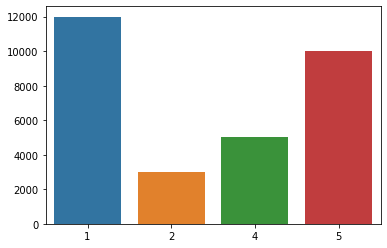

In [49]:
sns.barplot(x=amazonDataFiltered.Rating.value_counts().index, y=amazonDataFiltered.Rating.value_counts().values)

In [50]:
amazonDataFiltered["Sentiment"] = "Positive"
amazonDataFiltered["Sentiment"][amazonDataFiltered["Rating"].isin([1,2])]= "Negative"

C:\Users\Admin\AppData\Local\Temp/ipykernel_12464/131122136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazonDataFiltered["Sentiment"][amazonDataFiltered["Rating"].isin([1,2])]= "Negative"


In [51]:
amazonDataFiltered.head()

,Reviews,Rating,Sentiment
1,"nice phone, nice up grade from my pantach revu...",4,Positive
3,It works good but it goes slow sometimes but i...,4,Positive
4,Great phone to replace my lost phone. The only...,4,Positive
18,I love the phone. It does everything I need an...,4,Positive
20,The battery was old & had been over used becau...,4,Positive


In [52]:
amazonDataFiltered.tail()

,Reviews,Rating,Sentiment
87471,"Este equipo no levanta pin en Venezuela, lo he...",1,Negative
87472,I am truly disappointed not even by the phone ...,1,Negative
87473,"This phone worked only for a month, the batter...",1,Negative
87477,EL PRODUCTO (BLACKBERRY BOLD 9000) NO ME LLEGO...,1,Negative
87479,I bought the BlackBerry Bold 9000 in spite of ...,2,Negative


In [53]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

def lower_case(text):
    return text.lower()
def remove_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
def remove_username(text):
    return re.sub('@[^\s]+','',text)
def remove_urls(text):
    return re.sub(r"((http\S+)|(www\.))",'',text)
def remove_special_characters(text):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern,'',text)
    return text
def remove_single_char(text):
    return re.sub(r'\b[a-zA-Z]\b','',text)
def remove_multiple(text):
    return re.sub("(.)\\1{2,}","\\1",text)
tokenizer = ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    tokens = [token.lower() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_tokens = ' '.join(filtered_tokens)
    return filtered_tokens

In [28]:
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [54]:
import json
with open('contractions.json','r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict['contractions']
def replace_contractions(text):
    for word in text.split():
        if word.lower()  in contractions:
            text = text.replace(word,contractions[word.lower()])
    return text

In [55]:
with open('negations.json','r') as f:
    neg_dict = json.load(f)
negations = neg_dict['negations']

#Antonyms
#Negation Handler
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
# from nltk.
class AntonymReplacer(object):
    def replace(self,word):
        antonyms = set()
        for syn in wordnet.synsets(word):
            if syn.pos() in ['a' ,'s']:
                for lemma in syn.lemmas():
                    for antonym in lemma.antonyms():
                        antonyms.add(antonym.name())
        if(len(antonyms) == 1):
            return antonyms.pop()
        else:
            if word in negations:
                word = word.replace(word,negations[word])
                return word
        
    #Negation Replacer
    def negReplacer(self, string):
        i=0
        finalSent = ""
        sent = word_tokenize(string)
        length_sent = len(sent)
        words = []
        while i < length_sent:
            word = sent[i]
            if word == 'not' and i+1 < length_sent:
                antonymWord = self.replace(sent[i+1])
                if antonymWord:
                    words.append(antonymWord)
                    finalSent += antonymWord + " "
                    i += 2
                    continue
            words.append(word)
            finalSent += word + " "
            i += 1
        return finalSent
    
# replacer = AntonymReplacer()
# oppWord = replacer.negReplacer('not recommend')
# print(oppWord)
    
def replace_negation(text):
    
    replacer = AntonymReplacer()
    oppWord = replacer.negReplacer(text)
    return oppWord

# replace_negation('I am heavy')

In [56]:
amazonDataFiltered['Reviews'] =amazonDataFiltered['Reviews'].apply(lower_case)
amazonDataFiltered['Reviews'] =amazonDataFiltered['Reviews'].apply(remove_multiple)
amazonDataFiltered['Reviews'] =amazonDataFiltered['Reviews'].apply(remove_single_char)
amazonDataFiltered['Reviews'] =amazonDataFiltered['Reviews'].apply(remove_special_characters)
amazonDataFiltered['Reviews'] =amazonDataFiltered['Reviews'].apply(remove_square_brackets)
amazonDataFiltered['Reviews'] =amazonDataFiltered['Reviews'].apply(remove_urls)
amazonDataFiltered['Reviews'] =amazonDataFiltered['Reviews'].apply(remove_username)
amazonDataFiltered['Reviews'] =amazonDataFiltered['Reviews'].apply(replace_contractions)
amazonDataFiltered['Reviews'] =amazonDataFiltered['Reviews'].apply(replace_negation)
amazonDataFiltered['Reviews'] =amazonDataFiltered['Reviews'].apply(remove_stopwords)

In [57]:
X = amazonDataFiltered["Reviews"]
y = amazonDataFiltered["Sentiment"]

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
y_train.head()

33548    Positive
2505     Positive
10820    Negative
9460     Negative
46880    Negative
Name: Sentiment, dtype: object

In [61]:
y_test.head()

9450     Positive
24223    Positive
12862    Positive
28231    Positive
3653     Positive
Name: Sentiment, dtype: object

In [62]:
print(X_train.shape)
print(X_test.shape)

(24000,)
(6000,)


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer()

In [65]:
tfidf_vector.fit(X_train)

TfidfVectorizer()

In [66]:
tfidf_vector.get_feature_names()[-20:]

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['zenui',
 'zenuithe',
 'zero',
 'zerothe',
 'zf',
 'zillion',
 'zip',
 'ziplock',
 'zippy',
 'zippythe',
 'zips',
 'zmax',
 'zone',
 'zones',
 'zoom',
 'zoomed',
 'zooming',
 'zoverall',
 'zsound',
 'zte']

In [67]:
X_train_data = tfidf_vector.transform(X_train)

In [68]:
X_train_data.shape

(24000, 15712)

In [69]:
X_train_data

<24000x15712 sparse matrix of type '<class 'numpy.float64'>'
	with 360694 stored elements in Compressed Sparse Row format>

In [70]:
X_test_data = tfidf_vector.transform(X_test)

In [71]:
X_test_data

<6000x15712 sparse matrix of type '<class 'numpy.float64'>'
	with 90249 stored elements in Compressed Sparse Row format>

In [72]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train_data, y_train)

MultinomialNB()

In [73]:
predictions = MNB.predict(X_test_data)

In [74]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, predictions)

0.9356666666666666

In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    Negative       0.93      0.95      0.94      3054
    Positive       0.95      0.92      0.93      2946

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



# Test with different data

In [76]:
text1 = [
#         'Will not repurchase. Do not recommend',
#        'I hate this',
#        'I love this',
#        'This is not worth it',
#        'This is not terrible',
#        'This product so far has not disappointed',
        'Excellent product. Easy to use, large screen makes watching movies and reading easier.',
        'I am so happy today',
       'Note 10 has great camera quality. I am loving it.',
       'I dont know what is wrong with this phone. I have been trying to type but its not working.',
       'Dell laptop battery dead',
        'Good, but unhappy that screen size is small, less than I expected',
       'The product has not disappointed',
       'It is a expensive phone',
       'I hate apple',
        'less expensive than last year with so many more features and bigger screen!',
        'I do not enjoy working under tight deadline',
        'worst phone in the history',
        'phone is not good but has nice screen'
]
print(text1)
text_df1 = pd.DataFrame(text1,columns=['text'])
# print(text_df1)


['Excellent product. Easy to use, large screen makes watching movies and reading easier.', 'I am so happy today', 'Note 10 has great camera quality. I am loving it.', 'I dont know what is wrong with this phone. I have been trying to type but its not working.', 'Dell laptop battery dead', 'Good, but unhappy that screen size is small, less than I expected', 'The product has not disappointed', 'It is a expensive phone', 'I hate apple', 'less expensive than last year with so many more features and bigger screen!', 'I do not enjoy working under tight deadline', 'worst phone in the history', 'phone is not good but has nice screen']


In [77]:
text_df1['text'] =text_df1['text'].apply(lower_case)
text_df1['text'] =text_df1['text'].apply(remove_multiple)
text_df1['text'] =text_df1['text'].apply(remove_single_char)
text_df1['text'] =text_df1['text'].apply(remove_special_characters)
# text_df1['text'] =text_df1['text'].apply(remove_stopwords)
text_df1['text'] =text_df1['text'].apply(remove_square_brackets)
text_df1['text'] =text_df1['text'].apply(remove_urls)
text_df1['text'] =text_df1['text'].apply(remove_username)
text_df1['text'] =text_df1['text'].apply(replace_contractions)
text_df1['text'] =text_df1['text'].apply(replace_negation)
# text_df1['text'] =text_df1['text'].apply(remove_stopwords)

In [78]:
text_df1['text']

0     excellent product easy to use large screen mak...
1                                    am so happy today 
2           note has great camera quality am loving it 
3     dont know what is wrong with this phone have b...
4                             dell laptop battery dead 
5     good but unhappy that screen size is small les...
6                            the product has satisfied 
7                                it is expensive phone 
8                                           hate apple 
9     less expensive than last year with so many mor...
10                do hate working under tight deadline 
11                          worst phone in the history 
12               phone is not good but has nice screen 
Name: text, dtype: object

In [79]:
text=tfidf_vector.transform(text_df1['text'])

In [80]:
prediction = MNB.predict(text)

In [81]:
prediction

array(['Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive'], dtype='<U8')

In [82]:
list_of_tuples = list(zip(text_df1['text'], prediction)) 

In [83]:
pd.DataFrame(list_of_tuples, columns = ['Text', 'Sentiment'])

,Text,Sentiment
0,excellent product easy to use large screen mak...,Positive
1,am so happy today,Positive
2,note has great camera quality am loving it,Positive
3,dont know what is wrong with this phone have b...,Negative
4,dell laptop battery dead,Negative
5,good but unhappy that screen size is small les...,Positive
6,the product has satisfied,Positive
7,it is expensive phone,Negative
8,hate apple,Negative
9,less expensive than last year with so many mor...,Negative


TWITTER_SENTIMENT.CSV

In [84]:
twitterDf = pd.read_csv('twitter_sentiment.csv',encoding='ISO-8859-1')
twitterDf.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [85]:
twitterDf = twitterDf[["Sentiment","SentimentText"]]

In [86]:
twitterDf["Sentiment"] = twitterDf["Sentiment"].replace(0,"Negative")
twitterDf["Sentiment"] = twitterDf["Sentiment"].replace(1,"Positive")

In [87]:
twitterDf.head()

,Sentiment,SentimentText
0,Negative,is so sad for my APL frie...
1,Negative,I missed the New Moon trail...
2,Positive,omg its already 7:30 :O
3,Negative,.. Omgaga. Im sooo im gunna CRy. I'...
4,Negative,i think mi bf is cheating on me!!! ...


In [88]:
twitterDf.rename(columns={'Sentiment': 'Sentiment', 'SentimentText': 'Reviews'}, inplace=True)

In [89]:
data = pd.concat([amazonDataFiltered, twitterDf])
data.head()

,Reviews,Rating,Sentiment
1,nice phone nice grade pantach revue clean set ...,4.0,Positive
3,works good goes slow sometimes good phone love,4.0,Positive
4,great phone replace lost phone thing volume bu...,4.0,Positive
18,love phone everything need works great purchas...,4.0,Positive
20,battery old used barely holds charge otherwise...,4.0,Positive


In [90]:
data["Reviews"][200]

200    good hope phone seniors reminiscent cordless h...
200     @georgediaz #Magic ..thinking less than 50 % ...
Name: Reviews, dtype: object

In [91]:
data.tail()

,Reviews,Rating,Sentiment
99984,@Cupcake seems like a repeating problem hop...,NaN,Negative
99985,@cupcake__ arrrr we both replied to each other...,NaN,Positive
99986,@CuPcAkE_2120 ya i thought so,NaN,Negative
99987,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...,NaN,Positive
99988,@cupcake_kayla haha yes you do,NaN,Positive


In [92]:
data['Reviews'] = data['Reviews'].apply(lower_case)
data['Reviews'] = data['Reviews'].apply(remove_multiple)
data['Reviews'] = data['Reviews'].apply(remove_single_char)
data['Reviews'] = data['Reviews'].apply(remove_special_characters)
data['Reviews'] = data['Reviews'].apply(remove_square_brackets)
data['Reviews'] = data['Reviews'].apply(remove_urls)
data['Reviews'] = data['Reviews'].apply(remove_username)
data['Reviews'] = data['Reviews'].apply(replace_contractions)
data['Reviews'] = data['Reviews'].apply(replace_negation)
data['Reviews'] = data['Reviews'].apply(remove_stopwords)

In [93]:
X = amazonDataFiltered["Reviews"]
y = amazonDataFiltered["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer()
tfidf_vector.fit(X_train)
X_train_data = tfidf_vector.transform(X_train)
X_test_data = tfidf_vector.transform(X_test)

In [94]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train_data, y_train)
predictions = MNB.predict(X_test_data)
accuracy_score(y_test, predictions)

0.9285

In [95]:
def imp_feature(model,classifier):
    neg = classifier.feature_log_prob_[0,:].argsort()
    pos = classifier.feature_log_prob_[1,:].argsort()
    top_pos_words = np.take(model.get_feature_names(),pos)
    top_neg_words = np.take(model.get_feature_names(),neg)
    imp_df = pd.DataFrame(columns = ['Pos_Words','Pos_Importance','Neg_Words','Neg_Importance'])
    imp_df['Pos_Words'] = top_pos_words[::-1]
    imp_df['Pos_Importance'] = np.take(classifier.feature_log_prob_[1,:],pos)[::-1]
    imp_df['Neg_Words'] = top_neg_words[::-1]
    imp_df['Neg_Importance'] = np.take(classifier.feature_log_prob_[0,:],neg)[::-1]
    return imp_df

In [96]:
imp_feature(tfidf_vector, MNB)

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Pos_Words,Pos_Importance,Neg_Words,Neg_Importance
0,great,-3.935845,phone,-4.118495
1,good,-3.990749,work,-4.837699
2,phone,-4.151174,iphone,-5.373045
3,works,-4.580278,battery,-5.379264
4,love,-4.784445,unlocked,-5.405605
...,...,...,...,...
15836,doorstoppersonally,-10.820808,localizer,-10.957132
15837,learnt,-10.820808,located,-10.957132
15838,learns,-10.820808,lockcan,-10.957132
15839,learnedthink,-10.820808,logical,-10.957132


In [97]:
print('Train acc: ',accuracy_score(y_train, MNB.predict(X_train_data)))
print('Test acc: ', accuracy_score(y_test, predictions))

Train acc:  0.9435
Test acc:  0.9285


In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

# it shoes that out of 1012 data, 112 data that are acutally positive is predicted as negative

array([[2790,  162],
       [ 267, 2781]], dtype=int64)